In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque

from numpy import sin, cos

In [2]:
# define the constants
g = 9.8  # acceleration due to gravity in m/s^2
m1 = float(input("Enter mass 1 in kg: ")) # mass 1
m2 = float(input("Enter mass 2 in kg: "))  # mass 2
L1 = float(input("Enter length 1 in m: ")) # length 1
L2 = float(input("Enter length 2 in m: "))  # length 2
L = L1+L2
total_t = float(input("Enter total time in s: "))  # number of seconds to simulate
history_len = 50000  # number of trajectory points to display

# define initial values of theta 1, theta 2, angular momentum 1, and angular momentum 2
theta_1 = float(input("Enter theta 1 in degrees: "))
theta_2 = float(input("Enter theta 2 in degrees: "))
w1 = float(input("Enter angular velocity 1 in rad/s: "))
w2 = float(input("Enter angular velocity 2 in rad/s: "))

Enter mass 1 in kg: 3
Enter mass 2 in kg: 3
Enter length 1 in m: 4
Enter length 2 in m: 2
Enter total time in s: 5
Enter theta 1 in degrees: 67
Enter theta 2 in degrees: 2
Enter angular velocity 1 in rad/s: 1
Enter angular velocity 2 in rad/s: 1


In [3]:
def derivs(system, t):
    """
    Find the time derivatives of the thetas and angular momentums from the derived differential equations using 
    the Lagrangian. 
    
    Args:
        system: a 4-tuple of the initial values of (theta 1, angular momentum 1, theta 2, angular momentum 2)
        t: a time array
    
    Returns: a 4-tuple of the time derivatives of theta 1, angular momentum 1, theta 2, angular momentum 2
    """
    theta_1 = system[0]
    w1 = system[1]
    theta_2 = system[2]
    w2 = system[3]
    
    delta = theta_2 - theta_1
    
    dtheta_1 = w1
    dtheta_2 = w2
    domega_1 = (m2 * L1 * (w1**2) * sin(delta) * cos(delta) + m2*g*sin(theta_2)*cos(delta) 
                   + m2*L2*(w2**2)*sin(delta) - (m1+m2)*g*sin(theta_1))/((m1+m2)*L1 - m2*L1*(cos(delta))**2)
    domega_2 = (-m2*L2*(w2**2)*sin(delta)*cos(delta) + (m1+m2)*(g*sin(theta_1)*cos(delta)
                   - L1*(w1**2)*sin(delta)-g*sin(theta_2)))/ ((m1+m2)*L2 -m2*L2*(cos(delta))**2)
                   
    return(dtheta_1, domega_1, dtheta_2, domega_2)

In [4]:
# create an array of time steps 
dt = 0.02
t = np.arange(0, total_t, dt) 

# create a 4-tuple of theta 1, angular momentum 1, theta 2, and angular momentum 2 
# convert values in tuple to radians 
system = np.radians([theta_1, w1, theta_2, w2])

# use scipy.integrate.odeint function to solve for theta and angular momentum values for each timestep 
gen_coords = integrate.odeint(derivs, system, t)

# use the solved theta values to calculate the Cartesian coordinates 
# these values are used to plot the pendulum below
x1 = L1*sin(gen_coords[:, 0])
y1 = -L1*cos(gen_coords[:, 0])

x2 = L2*sin(gen_coords[:, 2]) + x1
y2 = -L2*cos(gen_coords[:, 2]) + y1



<IPython.core.display.Javascript object>


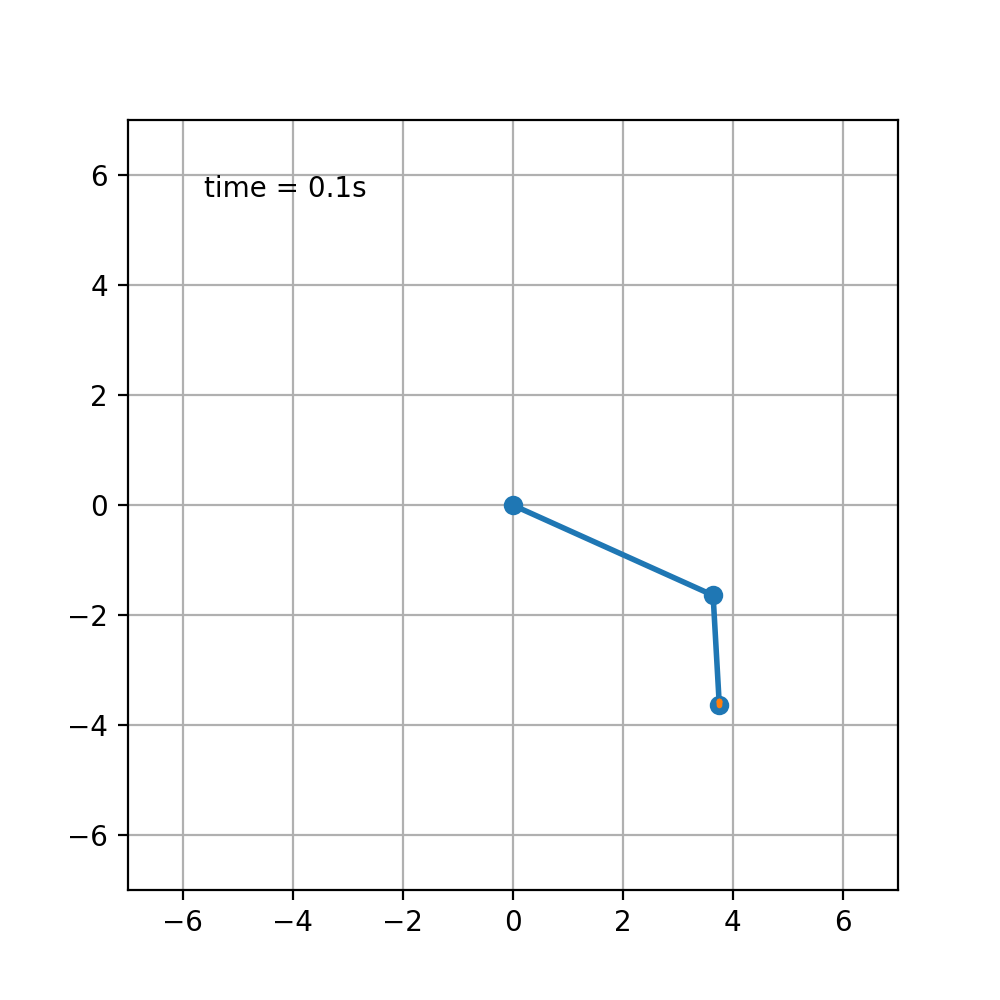

In [6]:
%matplotlib notebook

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L - 1, L + 1), ylim=(-L-1, L+1))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.1, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    current_x = [0, x1[i], x2[i]]
    current_y = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(current_x[2])
    history_y.appendleft(current_y[2])

    line.set_data(current_x, current_y)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text

 
ani = animation.FuncAnimation(
    fig, animate, len(gen_coords), interval=dt*1000, blit=True)
plt.show()